<a href="https://colab.research.google.com/github/SergeyMitrofanov88/Optimization_scripts/blob/main/Lagrange_opt_LW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as np
from scipy import interpolate
from numpy import polynomial as P
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

Pг = [80, 90, 100, 110, 120, 130, 140, 150, 160, 170]
B1 = [535, 515, 465, 395, 365, 333, 315, 335, 390, 475]
B2 = [470, 440, 413, 400, 370, 365, 345, 350, 380, 420]
B3 = [525, 515, 507, 498, 494, 497, 500, 512, 522, 531]
DayliLoad = [0.25, 0.25, 0.40, 0.60, 0.70, 0.85, 0.70, 0.72, 0.80, 1, 0.85, 0.60]
time = ['0..2', '3..4', '5..6', '7..8', '9..10', '11..12', '13..14', '15..16', '17..18', '19..20', '21..22', '23..24']

In [ ]:
p1 = P.Polynomial(B1)

p1.roots()

print(p1)
x1 = np.array(B1)
y1 = np.array(Pг)
deg = 3

f1b = P.Polynomial.fit(x1, y1, deg)
print(f1b)
f1b.coef

535.0 + 515.0·x + 465.0·x² + 395.0·x³ + 365.0·x⁴ + 333.0·x⁵ + 315.0·x⁶ +
335.0·x⁷ + 390.0·x⁸ + 475.0·x⁹
135.44868457 + 7.42868205·x - 25.38586001·x² - 41.37845619·x³


array([135.44868457,   7.42868205, -25.38586001, -41.37845619])

In [ ]:
p2 = P.Polynomial(B2)

p2.roots()

print(p2)
x2 = np.array(B2)
y2 = np.array(Pг)
deg = 3

f1b2 = P.Polynomial.fit(x2, y2, deg)
print(f1b2)
f1b2.coef

470.0 + 440.0·x + 413.0·x² + 400.0·x³ + 370.0·x⁴ + 365.0·x⁵ + 345.0·x⁶ +
350.0·x⁷ + 380.0·x⁸ + 420.0·x⁹
126.12628945 - 21.2178885·x - 16.0426968·x² - 11.72495645·x³


array([126.12628945, -21.2178885 , -16.0426968 , -11.72495645])

In [ ]:
p3 = P.Polynomial(B3)

p3.roots()

print(p3)
x3 = np.array(B3)
y3 = np.array(Pг)
deg = 3

f1b3 = P.Polynomial.fit(x3, y3, deg)
print(f1b3)
f1b3.coef

525.0 + 515.0·x + 507.0·x² + 498.0·x³ + 494.0·x⁴ + 497.0·x⁵ + 500.0·x⁶ +
512.0·x⁷ + 522.0·x⁸ + 531.0·x⁹
115.49995389 - 19.55489803·x + 23.6342896·x² + 40.80813291·x³


array([115.49995389, -19.55489803,  23.6342896 ,  40.80813291])

Text(0.5, 0, '$B1$')

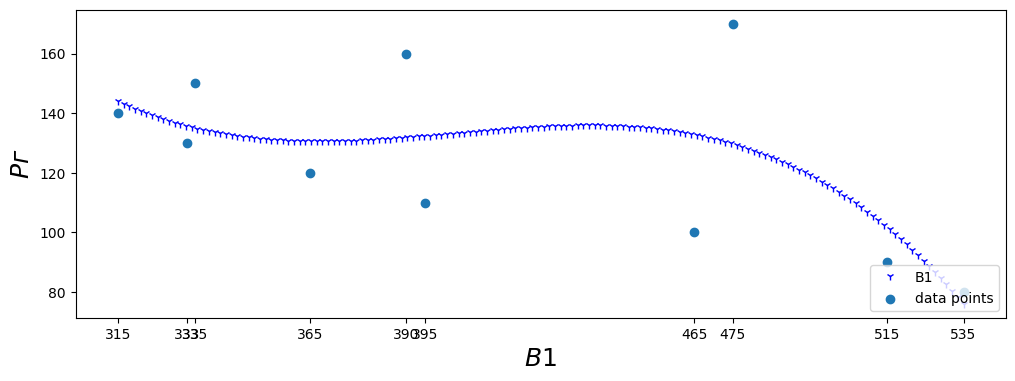

In [ ]:
xx = np.linspace(x1.min(), x1.max(), 150)
fig, ax = plt.subplots(1, 1, figsize = (12, 4))
ax.plot(xx, f1b(xx), 'b1', lw = 2, label = 'B1')
ax.scatter(x1, y1, label = 'data points')
ax.legend(loc=4)
ax.set_xticks(x1)
ax.set_ylabel(r"$Pг$", fontsize=18)
ax.set_xlabel(r"$B1$", fontsize=18)

Text(0.5, 0, '$B2$')

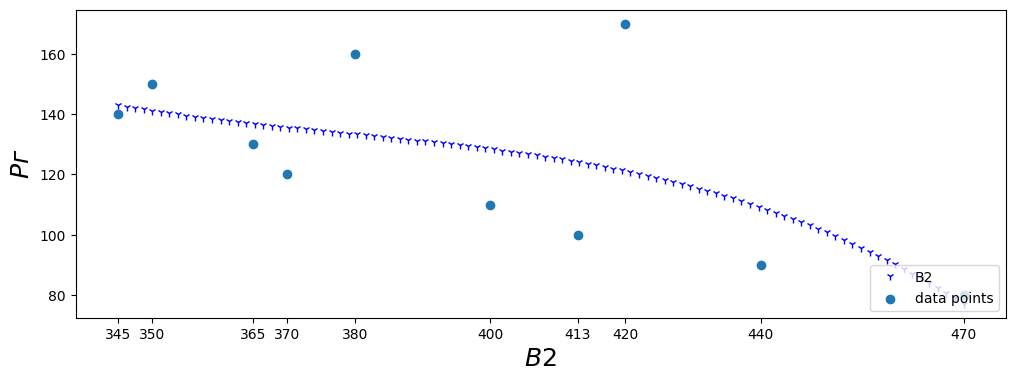

In [ ]:
xx2 = np.linspace(x2.min(), x2.max(), 100)
fig, ax = plt.subplots(1, 1, figsize = (12, 4))
ax.plot(xx2, f1b2(xx2), 'b1', lw = 2, label = 'B2')
ax.scatter(x2, y2, label = 'data points')
ax.legend(loc=4)
ax.set_xticks(x2)
ax.set_ylabel(r"$Pг$", fontsize=18)
ax.set_xlabel(r"$B2$", fontsize=18)

Text(0.5, 0, '$B3$')

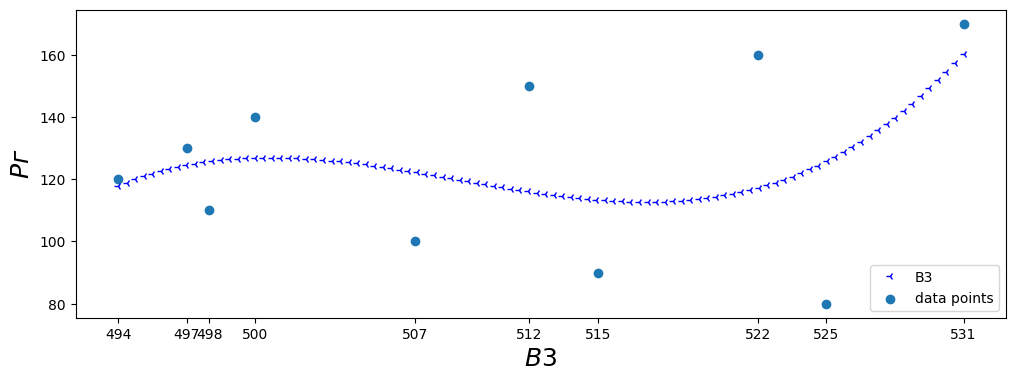

In [ ]:
xx3 = np.linspace(x3.min(), x3.max(), 100)
fig, ax = plt.subplots(1, 1, figsize = (12, 4))
ax.plot(xx3, f1b3(xx3), 'b3', lw = 2, label = 'B3')
ax.scatter(x3, y3, label = 'data points')
ax.legend(loc=4)
ax.set_xticks(x3)
ax.set_ylabel(r"$Pг$", fontsize=18)
ax.set_xlabel(r"$B3$", fontsize=18)

In [ ]:
print(f1b)
print(f1b2)
print(f1b3)
from sympy import symbols, diff

x = symbols('x')
function1 = 135.44868457 + 7.42868205*x - 25.38586001*x**2 - 41.37845619*x**3
function2 = 126.12628945 - 21.2178885*x - 16.0426968*x**2 - 11.72495645*x**3
function3 = 115.49995389 - 19.55489803*x + 23.6342896*x**2 + 40.80813291*x**3
derivative = diff(function1, x)
derivative2 = diff(function2, x)
derivative3 = diff(function3, x)
print('B1=', derivative)
print('B2=', derivative2)
print('B3=',derivative3)

135.44868457 + 7.42868205·x - 25.38586001·x² - 41.37845619·x³
126.12628945 - 21.2178885·x - 16.0426968·x² - 11.72495645·x³
115.49995389 - 19.55489803·x + 23.6342896·x² + 40.80813291·x³
B1= -124.13536857*x**2 - 50.77172002*x + 7.42868205
B2= -35.17486935*x**2 - 32.0853936*x - 21.2178885
B3= 122.42439873*x**2 + 47.2685792*x - 19.55489803


In [ ]:
from scipy.optimize import minimize
Pn = 150
def func(x):
  return ((7.42 - 50.77 * x[0] - 124.13* x[0] ** 2) + (-21.21 - 32.08 * x[1] - 35.17 * x[1] ** 2) + (-19.55 + 47.26 * x[2] + 122.4 * x[2] ** 2))
eq_cons = {'type': 'eq',
           'fun': lambda x: np.array ([x[0] + x[1] + x[2] - Pn])}
print(minimize(func, [25, 50, 25], method='SLSQP', constraints = eq_cons))

 message: Iteration limit reached
 success: False
  status: 9
     fun: nan
       x: [       nan        nan        nan]
     nit: 100
     jac: [       nan        nan        nan]
    nfev: 1251
    njev: 100


<ipython-input-10-e7fc58daa897>:4: RuntimeWarning: overflow encountered in scalar power
  return ((7.42 - 50.77 * x[0] - 124.13* x[0] ** 2) + (-21.21 - 32.08 * x[1] - 35.17 * x[1] ** 2) + (-19.55 + 47.26 * x[2] + 122.4 * x[2] ** 2))
<ipython-input-10-e7fc58daa897>:4: RuntimeWarning: invalid value encountered in scalar add
  return ((7.42 - 50.77 * x[0] - 124.13* x[0] ** 2) + (-21.21 - 32.08 * x[1] - 35.17 * x[1] ** 2) + (-19.55 + 47.26 * x[2] + 122.4 * x[2] ** 2))
<ipython-input-10-e7fc58daa897>:4: RuntimeWarning: overflow encountered in scalar multiply
  return ((7.42 - 50.77 * x[0] - 124.13* x[0] ** 2) + (-21.21 - 32.08 * x[1] - 35.17 * x[1] ** 2) + (-19.55 + 47.26 * x[2] + 122.4 * x[2] ** 2))


In [ ]:
from scipy.optimize import minimize
import numpy as np
x0_list = []
x1_list = []
x2_list = []
for i in range(12):
  Pd = Pn * DayliLoad[i]
# Определяем функции для каждого уравнения
  def equation1(x):
     return 7.42 - 50.77 * x[0] - 124.13 * x[0] ** 2

  def equation2(x):
      return -21.21 - 32.08 * x[1] - 35.17 * x[1] ** 2

  def equation3(x):
      return -19.54 + 47.26 * x[2] + 122.4 * x[2] ** 2

# Определяем функцию для минимизации
  def objective_function(x):
      return equation1(x) ** 2 + equation2(x) ** 2 + equation3(x) ** 2

# Определяем ограничение
  def constraint(x):
      return x[0] + x[1] + x[2] - Pd

# Начальное приближение
  x0 = np.array([0, 0, 0])

# Минимизируем функцию с учетом ограничения
  result = minimize(objective_function, x0, constraints={'type': 'eq', 'fun': constraint})
  print('Решение', i + 1)
  print("Оптимальные значения переменных x[0], x[1], x[2]:",result.x)
  x0_list.append(result.x[0])
  x1_list.append(result.x[1])
  x2_list.append(result.x[2])
print(x0_list, sep = "\n")
print(x1_list, sep = "\n")
print(x2_list, sep = "\n")

Решение 1
Оптимальные значения переменных x[0], x[1], x[2]: [ 8.66094318 20.07984515  8.75921167]
Решение 2
Оптимальные значения переменных x[0], x[1], x[2]: [ 8.66094318 20.07984515  8.75921167]
Решение 3
Оптимальные значения переменных x[0], x[1], x[2]: [13.85921548 32.13572034 14.00506418]
Решение 4
Оптимальные значения переменных x[0], x[1], x[2]: [20.7910217  48.20766945 21.00130885]
Решение 5
Оптимальные значения переменных x[0], x[1], x[2]: [24.25704482 56.24324816 24.49970702]
Решение 6
Оптимальные значения переменных x[0], x[1], x[2]: [29.45615339 68.29637841 29.7474682 ]
Решение 7
Оптимальные значения переменных x[0], x[1], x[2]: [24.25704482 56.24324816 24.49970702]
Решение 8
Оптимальные значения переменных x[0], x[1], x[2]: [24.95025624 57.8503434  25.19940036]
Решение 9
Оптимальные значения переменных x[0], x[1], x[2]: [27.72310965 64.27869235 27.99819799]
Решение 10
Оптимальные значения переменных x[0], x[1], x[2]: [34.65531338 80.34934075 34.99534586]
Решение 11
Оптималь

In [ ]:
import pandas as np
dframe1 = np.DataFrame(list(zip(DayliLoad, x0_list, x1_list, x2_list)), columns=['Load', 'P1', 'P2', "P3"])
dframe1

,Load,P1,P2,P3
0,0.25,8.660943,20.079845,8.759212
1,0.25,8.660943,20.079845,8.759212
2,0.40,13.859215,32.135720,14.005064
3,0.60,20.791022,48.207669,21.001309
4,0.70,24.257045,56.243248,24.499707
5,0.85,29.456153,68.296378,29.747468
6,0.70,24.257045,56.243248,24.499707
7,0.72,24.950256,57.850343,25.199400
8,0.80,27.723110,64.278692,27.998198
9,1.00,34.655313,80.349341,34.995346


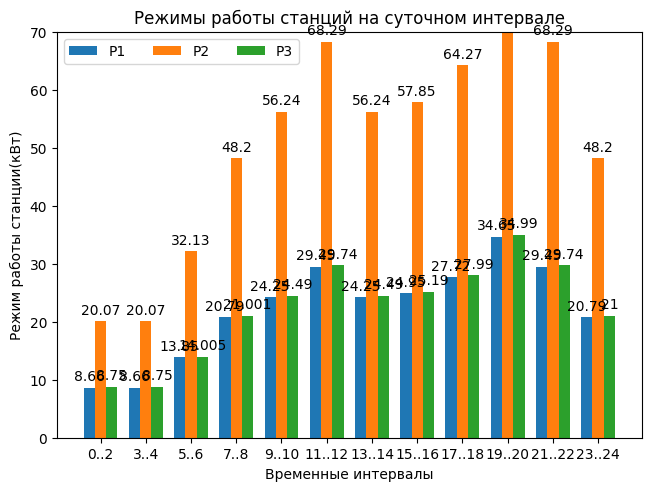

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
species = time
penguin_means = {
    'P1': (8.66, 8.66, 13.85, 20.79, 24.25, 29.45, 24.25, 24.95, 27.72, 34.65, 29.45, 20.79),
    'P2': (20.07, 20.07, 32.13, 48.2, 56.24, 68.29, 56.24, 57.85, 64.27, 80.34, 68.29, 48.2),
    'P3': (8.75, 8.75, 14.005, 21.001, 24.49, 29.74, 24.49, 25.19, 27.99, 34.99, 29.74, 21.00),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Режим работы станции(кВт)')
ax.set_xlabel('Временные интервалы')
ax.set_title('Режимы работы станций на суточном интервале')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 70)

plt.show()

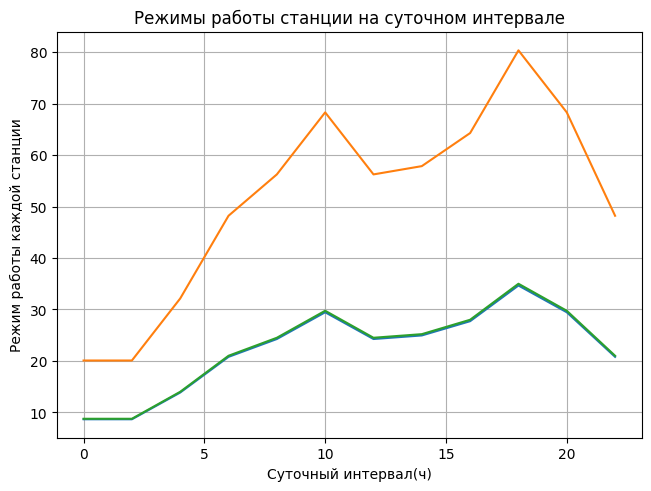

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = range(0,24, 2)
p1 = x0_list
p2 = x1_list
p3 = x2_list

fig, ax = plt.subplots(layout='constrained')
ax.plot(t, p1)
ax.plot(t, p2)
ax.plot(t, p3)


ax.set(xlabel='Суточный интервал(ч)', ylabel='Режим работы каждой станции',
       title='Режимы работы станции на суточном интервале')
ax.grid()
plt.show()